# Assignment 1

This assignment covers material from Weeks 1–4. Think of it as a spot-check: five exercises that test important analytical and visualization skills from the first part of the course.

## Formalia:

<mark>Please read the **[assignment overview page](https://github.com/suneman/socialdata2026/wiki/Assignments)** carefully before proceeding.</mark> This page contains information about formatting (including formats etc.), group sizes, and many other aspects of handing in the assignment. 

***If you fail to follow these simple instructions, it will negatively impact your grade!***

**Due date and time**: The assignment is due on Monday March 2nd, 2026 at 23:55. Hand in your files via DTU Learn. 

## Important Notes:
**All exercises use your combined SF crime dataset** (2003–present) that you built during Week 2, along with your Personal Focus Crimes. Make sure you have those ready before you start.
* **Hint**: The number of focus crimes are up to you, but choosing very few focus-crimes (1-5, let's say) feels like taking the easy way out to me, so to get top marks, you'll need 8 or more focus crimes (but it's not that more are better, 16 isn't necessarily better than 8).

Each assignment draws directly on the weekly exercises - you should be able to pull your work directly from there.

<div class="alert alert-block alert-info">
The same LLM guidance applies here as during the weekly exercises: use your LLM freely for coding, pandas syntax, and plot formatting. Do not use it for interpretation, reflection, or anything that asks for your own thinking. 
<br>  <br>
If you use and LLM to cheat, you are missing out on your education ... it will mean that you're not getting all you can out of this class ... and, more importantly, that you are literally wasting this crucial time of your DTU-journey, designed to make you smarter and ready for the world.
</div>

---
## Assignment 1.1: Temporal Overview

Let's start by getting the big picture of how crime has changed over the full 20+ year period covered by your combined dataset.

*Draws from*: Week 1, Exercises 4.1 and 4.2 — applied here to the full merged dataset (2003–present) rather than just 2018–present.

> * Using your combined dataset (2003–present), plot the total number of incidents **per year** for each of your Personal Focus Crimes. Display at least the years 2003–2025. 
> * Make sure your plot follows good visualization practices: labeled axes, a legend, a descriptive title.
> * Identify and comment on at least two notable features in the plot — for example, long-term trends, sudden drops or spikes, or the impact of COVID-19 in 2020. For each feature, offer a possible explanation.

In [1]:
#Loading the combine dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import MinuteLocator, DateFormatter
import scipy.stats as stats
import numpy as np

df = pd.read_csv('Final_Crime_Dataset.csv')
df = df.drop_duplicates(subset=['IncidntNum', 'Category'])

df = df.dropna(subset=['PdDistrict'])
df = df[df['PdDistrict'] != 'OUT OF SF']

## Data Visualization for the Different Crimes types we selected

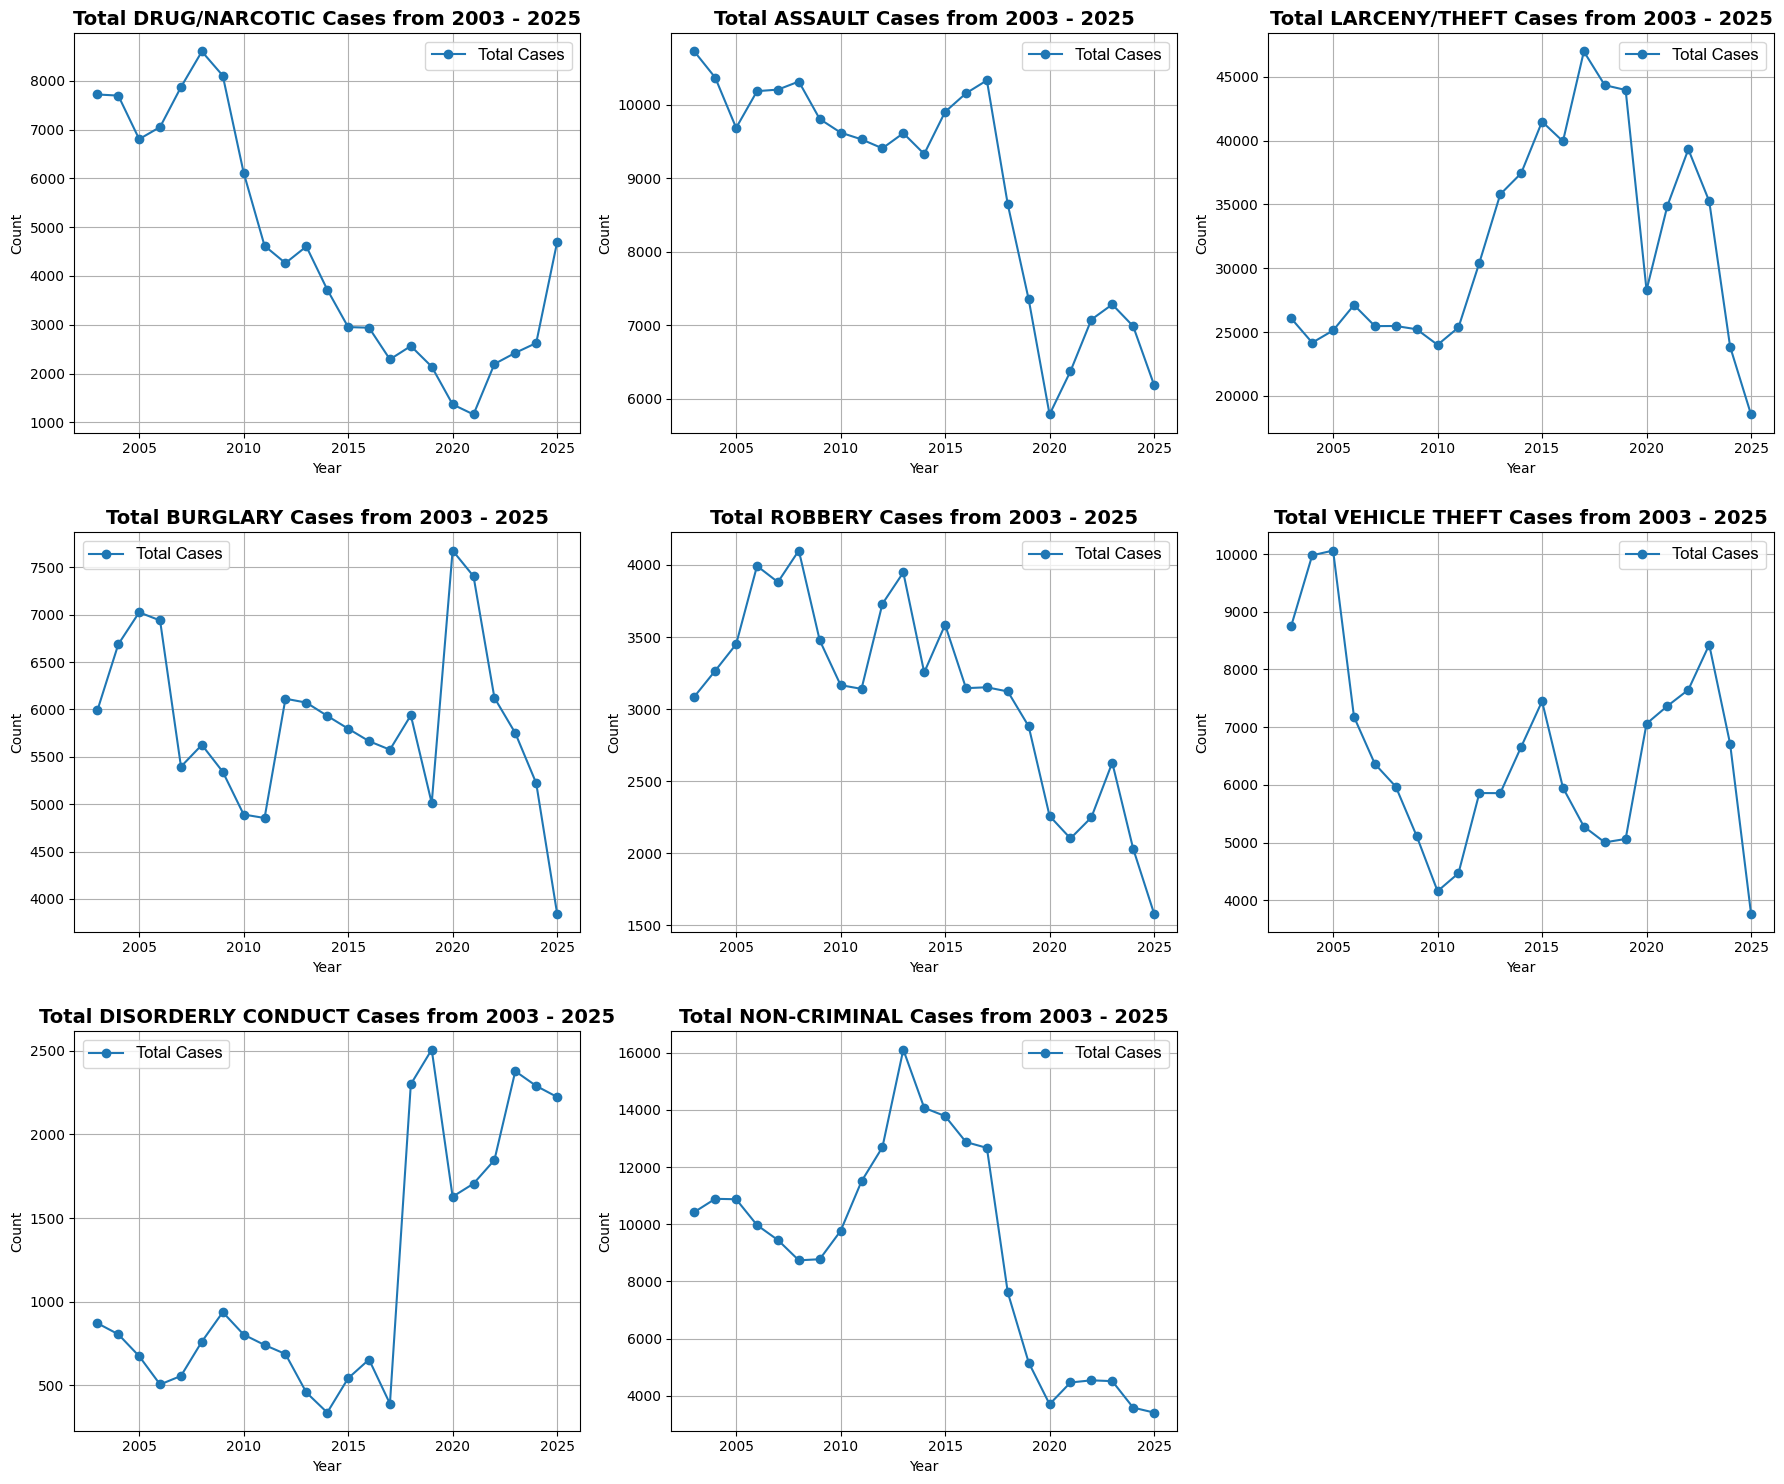

In [2]:

Catagory = df['Category'].unique()

df['Year'] = pd.to_datetime(df['Date'], format='%Y-%m-%d').dt.year

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten() 

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12

for i, cat in enumerate(Catagory):
    ax = axes[i]

    cat_df = df[df['Category'] == cat]
    cat_yearly_counts = cat_df.groupby('Year').size()

    ax.plot(cat_yearly_counts.index, cat_yearly_counts.values, marker='o')

    ax.set_title(f'Total {cat} Cases from 2003 - 2025', fontsize=14, fontweight='bold')
    ax.set_xlabel('Year')
    ax.set_ylabel('Count')
    ax.grid(True)
    ax.legend(['Total Cases'])
    plt.tight_layout()

for j in range(len(Catagory), 9):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.subplots_adjust(hspace=0.25)
plt.show()


## Comments

The impact of covid is noticeable in the graph. Almost all crimes dropped on 2020 with the exception of Bulglary and Vehicle Theft. Burlguragry reached an all time high on 2020 and stayed relatively similar level in 2021 which were the peak COVID time priod. A possible explanation is increase in bulgarly due to financial hardship during covid while a decrease in other crimes due to lockdowns. Another interesting trend I found was the drop of drug related crime in 2010-2011. One possible explanation is, 2009 was when President Obama was elected and in 2010 he changed madantaory minimum to be charged with possesion with crack cocaine with the Fair Sentencing Act(2010) (https://www.congress.gov/bill/111th-congress/senate-bill/1789) which came in effect August 2010. This could explain a 3500+ cases decrease just in San Francisco. I also tried to look if Trump changed the drug policy in his current term resulting a spike in 2025 but I could not find anything concreate. 

For visuialization, I chose seperate subplot as opposed to one plot as Larceny/theft has a larger number than cases than the other, causeing it obsure the trends. For the same reason I have not fixed the x axis as they also hid the trends in crimes that occur in smaller number.

---
## Assignment 1.2: Crime Profiles by Police District

Different parts of the city have very different crime patterns. Here we quantify that using conditional probabilities.

*Draws from*: Week 3, Exercises 2.1 and 2.2.

> * For each police district in your dataset, compute the **conditional crime profile**: for each of your Personal Focus Crimes, calculate
>
>   $$r(\text{crime}, \text{district}) = \frac{P(\text{crime} \mid \text{district})}{P(\text{crime})}$$
>
>   A value above 1 means that crime type is *over-represented* in that district relative to the city-wide average; below 1 means it is *under-represented*.
> * Visualize these ratios in a way that makes it easy to compare across both districts and crime types. (Simple barcharts are fine, but you may also use ideas from more complex visualization techniques, for example, a heatmap could work well here, but you're free to choose another format if you can justify it.)
> * Pick **one district** whose profile stands out to you. Describe the pattern and offer an explanation for why that district looks the way it does. Are there geographic, demographic, or other factors that might explain it?

Creation of Relative Matix for heatmap

In [3]:
df['Category'] = df['Category'].str.capitalize()
df['PdDistrict'] = df['PdDistrict'].str.capitalize()

total_crimes = df.shape[0]
crime_probabilities = df['Category'].value_counts() / total_crimes

districts = df['PdDistrict'].unique()
categories = crime_probabilities.index

relative_matrix = pd.DataFrame(index=districts, columns=categories)

for district in districts:
    district_df = df[df['PdDistrict'] == district]
    district_probs = (
        district_df['Category']
        .value_counts(normalize=True)
        .reindex(categories, fill_value=0)
    )
    
    relative_probs = district_probs / crime_probabilities
    relative_matrix.loc[district] = relative_probs

relative_matrix = relative_matrix.astype(float)


## Data Visualization for Conditional Crime Profile

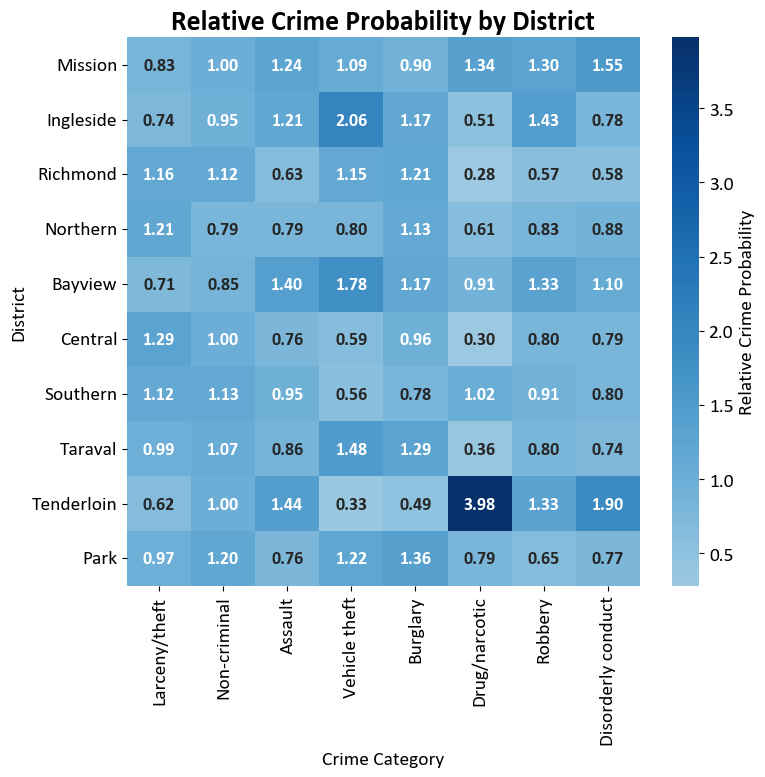

In [4]:

plt.rcParams['font.family'] = 'Calibri'
plt.rcParams['font.size'] = 14
plt.figure(figsize=(8, 8))


sns.heatmap(
    relative_matrix,
    annot=True,         
    fmt=".2f",          
    cmap='Blues',   
    center=1,           
    cbar_kws={'label': 'Relative Crime Probability'},
    annot_kws={"size": 13, "weight": 'bold'},

    
)

plt.title('Relative Crime Probability by District', fontsize=20, fontweight='bold')
plt.xlabel('Crime Category')
plt.ylabel('District')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Comments

The district that stands out for me is the Tenderlion as it has realtively low vehicle theft and burgluarly but high Drug cases. Seeing data like this my inital assumtion was that this is low income neighbourhood. Studies have shown correlation between low income and drug use(One example- https://www.sciencedirect.com/science/article/abs/pii/S0376871621007407). Additionally we can argue that if there are not of valuable cars or valuables in homes in makes sense that veichle theft and bulguraly would be low. To confirm my assumption I refered to statoistical atlas who visualize data from the US census Bureau and it confirmed that Tenderloin has the lowest median income in the state at 24,000 USD (for reference the median income of San Franscisco is 140,000 USD) with aroud 58% of the household income falling short of the 25,000 USD mark. One thing I did found interesting was Chinatown(Central) and Hunterpoint(Bayview) are the other poor neighbourhoods however they dont have this relative Drug Cases.

Sources of Tenderlion stats - https://statisticalatlas.com/neighborhood/California/San-Francisco/Tenderloin/Household-Income

---
## Assignment 1.3: Visualizing Distributions

This exercise asks you to recreate several classic plot types from DAOST Chapter 2 using your own crime data — putting visualization theory into practice.

*Draws from*: Week 3, Exercises 5.2 and 5.3.

> **Part A — Jitter plot**
> * Pick one of your Personal Focus Crimes and a suitable time interval (somewhere between a month and 6 months, depending on how common the crime is). Create a jitter plot of the incident times during a single hour (e.g. 13:00–14:00): let time run along the $x$-axis and add vertical jitter.
> * What does the jitter plot reveal about how times are recorded in the dataset? Are incidents clustered at certain minutes (on the hour, half hour, etc.)? What does this tell you about the precision of the data?
>
> **Part B — Probability plot**
> * Using the same geographic data from Part B, create a probability plot (QQ plot) for the latitude distribution of each of your two crime types. (`scipy.stats.probplot` is your friend here.)
> * What reference distribution are you comparing against? What would it mean if the points fell exactly on the straight line? Where does the distribution deviate from normal, and what does that deviation tell you about the geography of crime in SF?
>
> **Part C — Box plots of time-of-day**
> * For each of your Personal Focus Crimes, extract the time-of-day of every incident.
> * Create box plots showing the time-of-day distribution for all your Personal Focus Crimes side by side.
> * What patterns do you see? Are there crimes that happen mostly at night? Mostly during business hours? For crimes that peak late at night, does the box plot handle the wrap-around at midnight well? What goes wrong?
> * Above, feel free to use alternatives to box plots — violin plots, swarm plots, or raincloud plots — if you think they reveal more. If you do, briefly explain what the alternative shows that the box plot doesn't.

## Jitter Plot

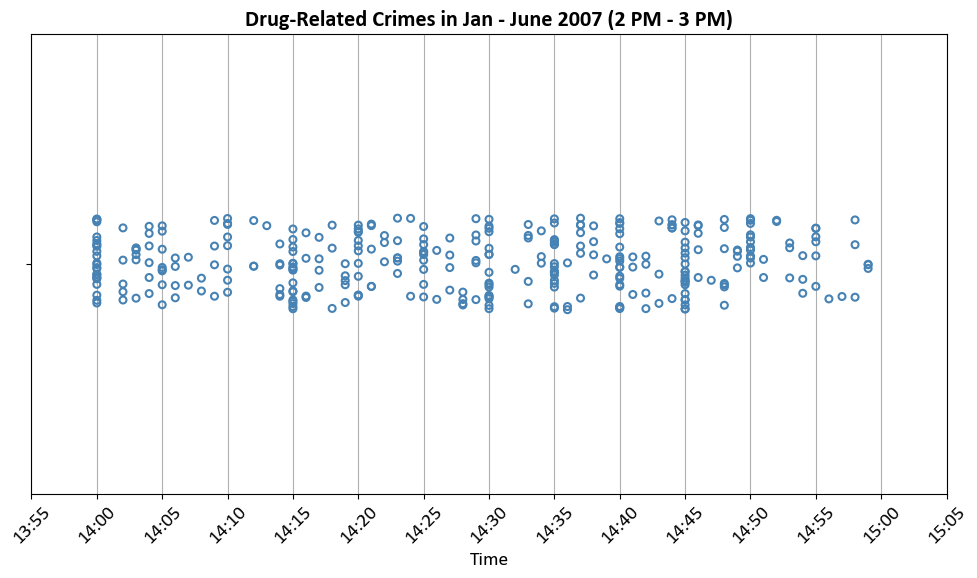

In [5]:

drug_df = df[df['Category'] == 'Drug/narcotic'].copy()
drug_df['Date'] = pd.to_datetime(drug_df['Date'], format='%Y-%m-%d')
drug_df = drug_df[(drug_df['Date'] >= '2007-01-01') & (drug_df['Date'] <= '2007-06-30')]

drug_df['Time'] = pd.to_datetime(drug_df['Time'], format='%H:%M')
drug_df = drug_df[drug_df['Time'].dt.hour == 14 ]

plt.figure(figsize=(10, 6))

ax = sns.stripplot(
    x='Time',
    data=drug_df,
    jitter=True,
    edgecolor='steelblue',
    linewidth=1.5,
    facecolors='none'
)

ax.xaxis.set_major_locator(MinuteLocator(interval=5))
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
plt.xticks(rotation=45)

ax.set_xlim(pd.to_datetime('13:55', format='%H:%M'), pd.to_datetime('15:05', format='%H:%M'))

plt.title('Drug-Related Crimes in Jan - June 2007 (2 PM - 3 PM)', 
          fontsize=16, fontweight='bold')
plt.xlabel('Time')
plt.tight_layout()
plt.grid(axis='x')
plt.show()

## Comments

The jiter plots reveal that data is more concentrated around 00, 15, 30, 35, 40 and 45. This definetly means that the time in our data set isn't the most precise. There is a possibility that the criminals are super precise and commit crimes on rounded number but it most likely we are not able recall the time precisisely when reporting and they get report in a rounded number. So when we look at time related data we can maybe feel confident on larger trends but should always acknowledge the fact thatisnt exact.

In [6]:
df[['longitude', 'latitude']] = df['location'].str.replace('POINT \(', '', regex=True)\
                                               .str.replace('\)', '', regex=True)\
                                               .str.split(' ', expand=True)


df['longitude'] = df['longitude'].astype(float)
df['latitude'] = df['latitude'].astype(float)

#I have noticed some datapoint that are -120, 90 that is not in San Fransisco which was making the binning weird as it would skew the range just a saftely to reomve them
df = df[df['latitude'] != 90]

drug_df = df[df['Category'] == 'Drug/narcotic']
drug_df = drug_df[drug_df['Year'] == 2009]

car_df =df[df['Category'] == 'Non-criminal']
car_df = car_df[car_df['Year'] == 2009]

data = drug_df['latitude']
data_c = car_df['latitude']




## QQ Plots

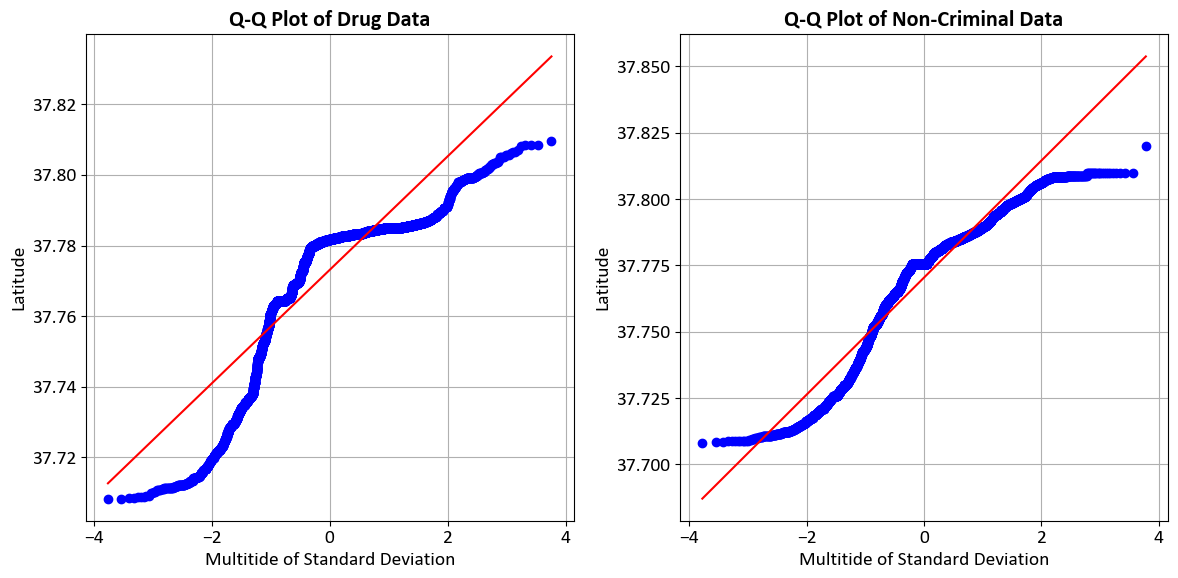

In [7]:
data_clean = pd.to_numeric(data, errors='coerce').dropna()
data_c_clean = pd.to_numeric(data_c, errors='coerce').dropna()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

ax = axes[0]
stats.probplot(data_clean, dist="norm", plot=ax)

ax.set_title("Q-Q Plot of Drug Data", fontsize=16, fontweight='bold')
ax.set_xlabel("Multitide of Standard Deviation")
ax.set_ylabel("Latitude")
ax.grid(True)


ax = axes[1]
stats.probplot(data_c_clean, dist="norm", plot=ax)

ax.set_title("Q-Q Plot of Non-Criminal Data", fontsize=16, fontweight='bold')
ax.set_xlabel("Multitide of Standard Deviation")
ax.set_ylabel("Latitude")
ax.grid(True)

plt.tight_layout()
plt.show()

## Comments

For the QQ plot the reference distribution is the Normal distribution. If the points fall exactly on the line then we can conclude that they are normally distributed. Both of our plots do not fall on the line hence we can conclude that both crimes are not evenlly distributed accross the Latitiude of San Fransisco.

## Box/Violin Plot

C:\Users\praga\AppData\Local\Temp\ipykernel_32816\3883401785.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'], errors='coerce')


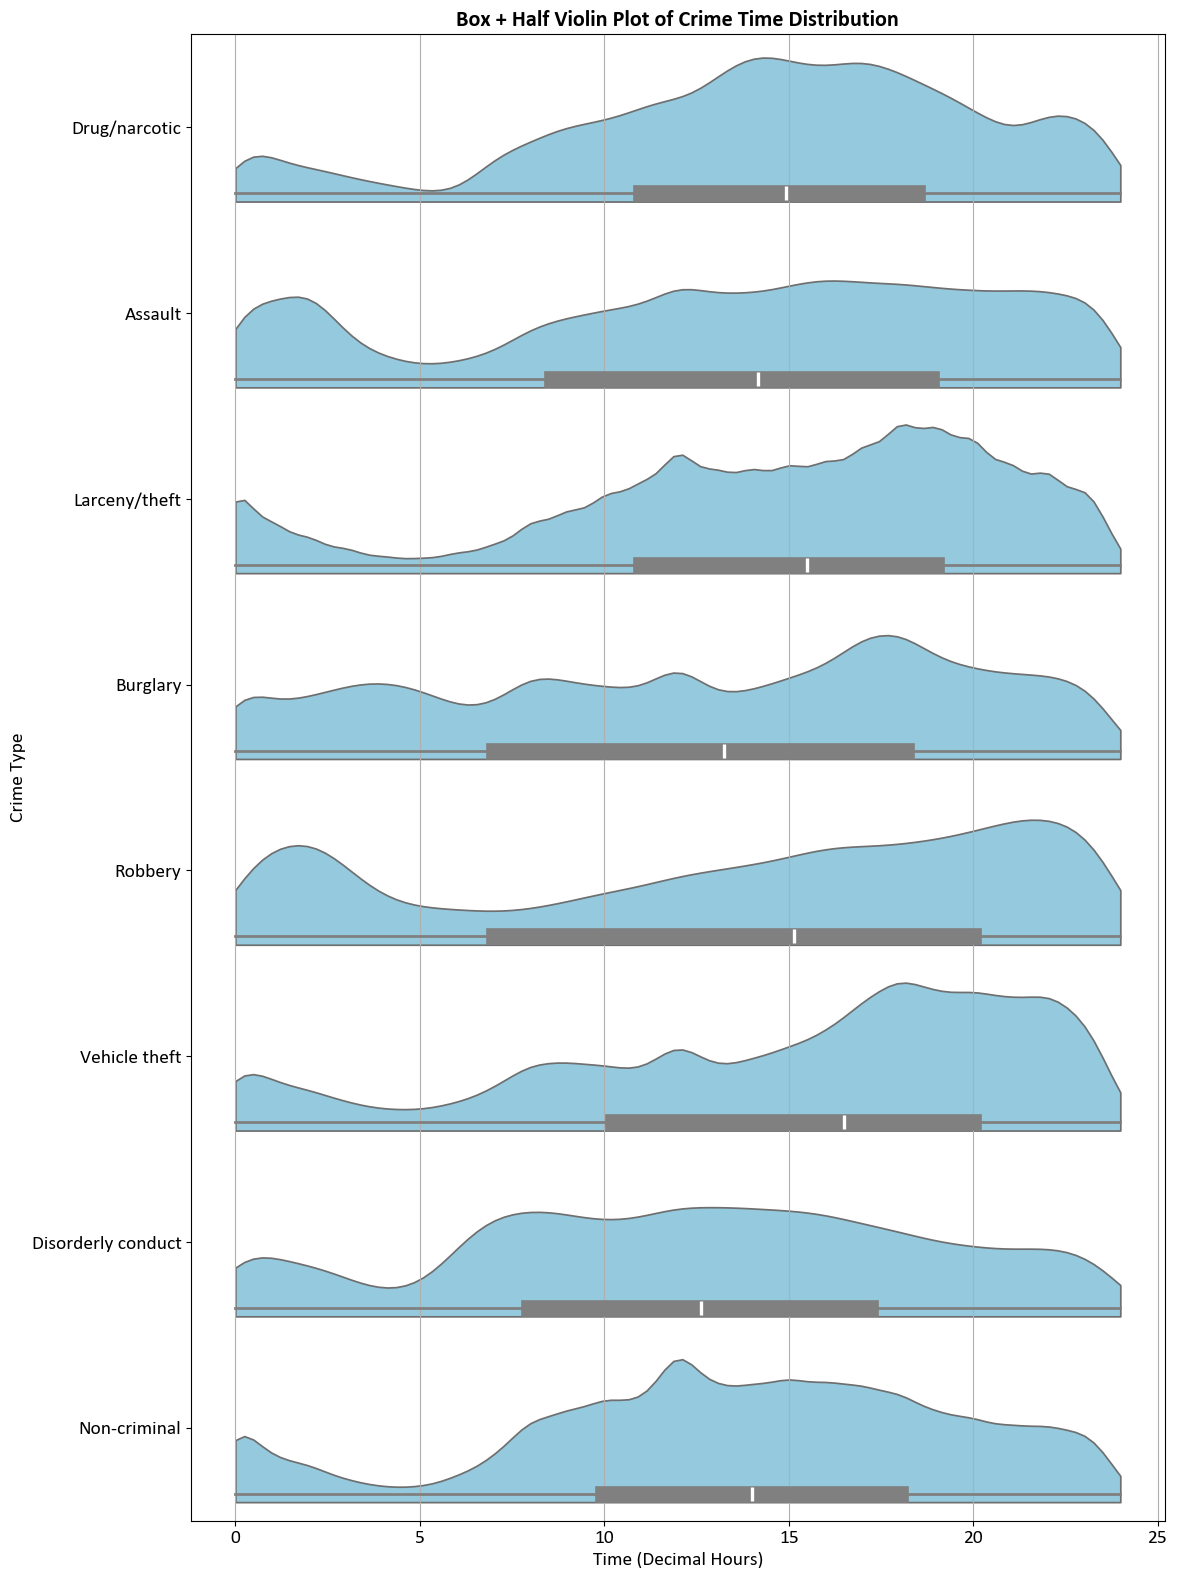

In [8]:
import ptitprince as pt
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')
df['Box_pt_time'] = (df['Time'].dt.hour + df['Time'].dt.minute / 60)

plt.figure(figsize=(12, 16))
sns.violinplot(
    x='Box_pt_time',
    y='Category',
    data=df,
    cut=0,
    inner='box',
    color='skyblue',
    split=True,
    inner_kws=dict(box_width=12, whis_width=2, color="grey")
)

plt.xlabel("Time (Decimal Hours)")
plt.ylabel("Crime Type")
plt.title("Box + Half Violin Plot of Crime Time Distribution", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.grid(axis='x')
plt.show()



## Comments

For the last part of 1.3 I have made the box plots for time of day however I have also added half of a violin plot on top of it. This is mainly because Box plot are very bad approximation cyclical time data like hours. On the other hand, a violin plot reveals more info about the distribution of crime. For example with the vehicle theft part, the box plot says majority occur between 10 AM to 20 PM however the violin plot shows that majority of this crime occurs during the night between 17PM and 24PM

Documention of seaborn was used to make this possible (https://seaborn.pydata.org/generated/seaborn.violinplot.html)

---
## Assignment 1.4: Spatial Power Law

Is crime spread evenly across San Francisco, or is it concentrated in a small number of hotspots? Let's find out.

*Draws from*: Week 4, Exercise 2.2.

Use your **most common Personal Focus Crime** (by total incident count) for this exercise.

> * **Step 1**: Divide San Francisco into a grid of approximately $100\text{m} \times 100\text{m}$ cells using latitude and longitude. It is fine to ignore that the Earth isn't flat — the approximation is good enough for this purpose.
>     * **Hint**: `np.histogram2d` works well here. Focus on points within the SF peninsula; filter out geographic outliers.
> * **Step 2**: Count the number of incidents of your chosen crime in each grid cell (use all years of data).
> * **Step 3**: Tally the distribution. Count how many cells have exactly $k$ incidents — call this $N(k)$ — for $k = 0, 1, 2, \ldots$ up to the maximum.
> * **Step 4**: Plot $(k+1)$ vs $N(k)$ on **linear axes**.
> * **Step 5**: Plot $(k+1)$ vs $N(k)$ on **loglog axes**.
> * **Step 6**: Does your crime follow a power-law spatial distribution? How can you tell from the loglog plot?
> * **Step 7**: If crime is spatially concentrated in a small number of cells, what does that imply for how we interpret neighborhood-level crime statistics? Does the "average block" tell you anything useful?

# First, finding the most common Personal Focus crime

In [9]:
incident_number = df['Category'].value_counts()
print(incident_number)

Category
Larceny/theft         728465
Non-criminal          209557
Assault               204837
Vehicle theft         150133
Burglary              134876
Drug/narcotic         104525
Robbery                71219
Disorderly conduct     26613
Name: count, dtype: int64


As we can see above Larceny/Theft is the most common crime. The plots below will be using this crime exclusively

First we are preparing the relevant entries before creating the data visualizations 

In [10]:


# Filter for Larceny Theft
larceny_df = df[df['Category'] == 'Larceny/theft']

# Keep only rows with valid coordinates
larceny_df = larceny_df.dropna(subset=['latitude', 'longitude'])

lat = larceny_df['latitude'].values
lon = larceny_df['longitude'].values

print("After dropping NaNs:", len(larceny_df))
print("Lat size:", lat.size)
print("Lon size:", lon.size)

# Define the grid size in degrees (roughly 100m ~ 0.001° latitude)
grid_size = 0.001 

#np.arange(start, stop, step) generates evenly spaced numbers from start to stop (exclusive of stop unless you add it manually).
lat_bins = np.arange(lat.min(), lat.max() + grid_size, grid_size) 
lon_bins = np.arange(lon.min(), lon.max() + grid_size, grid_size) 

# Compute 2D histogram
hist, lat_edges, lon_edges = np.histogram2d(lat, lon, bins=[lat_bins, lon_bins])

# Flatten and remove empty cells
counts = hist.flatten()
counts = counts[counts > 0]


After dropping NaNs: 706129
Lat size: 706129
Lon size: 706129


# Linear Plot

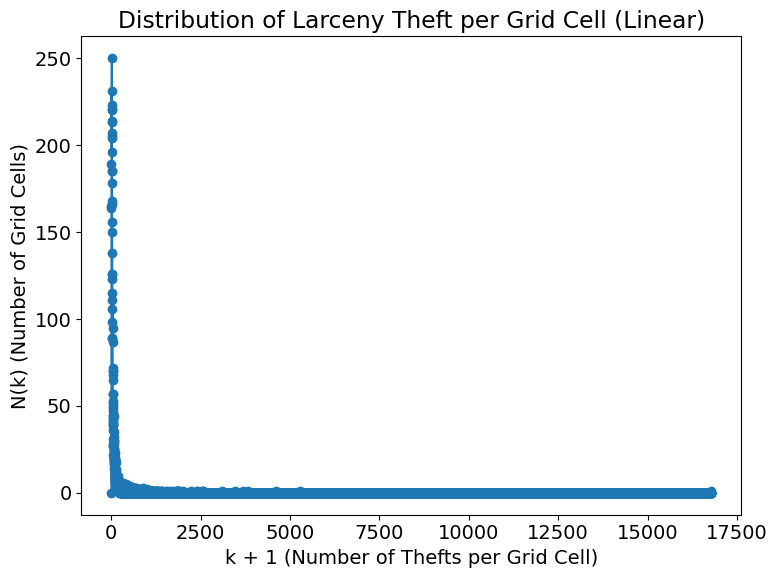

In [11]:
# Maximum number of thefts in any grid cell
C_max = int(counts.max())

# Initialize array to hold N(k)
N = np.zeros(C_max + 1) 

# Count number of grid cells with k thefts
for k in range(C_max + 1):
    N[k] = np.sum(counts == k)

k_values = np.arange(C_max + 1)

plt.figure(figsize=(8,6))
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.plot(k_values + 1, N, marker='o', linestyle='-')
plt.xlabel('k + 1 (Number of Thefts per Grid Cell)')
plt.ylabel('N(k) (Number of Grid Cells)')
plt.title('Distribution of Larceny Theft per Grid Cell (Linear)')
plt.tight_layout()
plt.show()

The plot above allows us to see the linear distribution between the Grid cells (which correspond to particual areas) and the number of theft crimes. We can clearly see by the long tail of the distribution that the biggest ammount of crimes do happen in a couple of selected areas. 

# Log-log plot

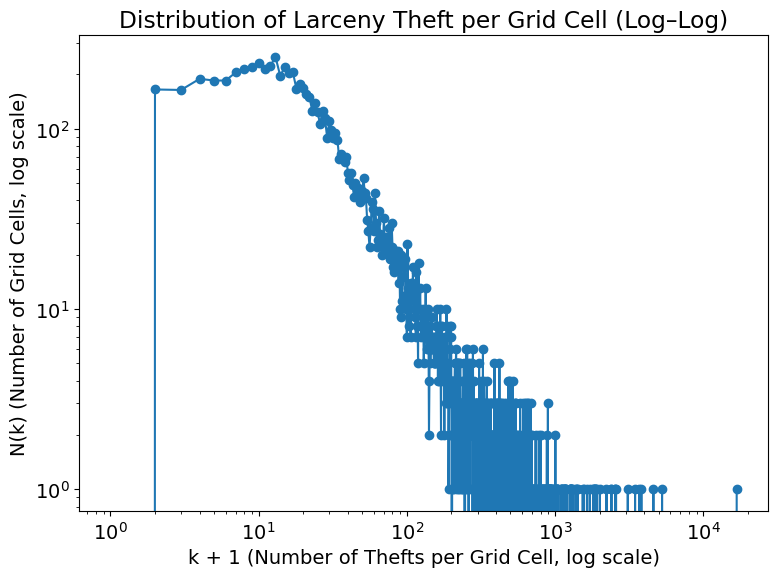

In [12]:
plt.figure(figsize=(8,6))
plt.plot(k_values + 1, N, marker='o', linestyle='-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k + 1 (Number of Thefts per Grid Cell, log scale)')
plt.ylabel('N(k) (Number of Grid Cells, log scale)')
plt.title('Distribution of Larceny Theft per Grid Cell (Log–Log)')
plt.tight_layout()
plt.show()

From the plot above and specifically from the straight line (going diagonally from top left to bottom right) on the right side of it we can see that indeed there is present a power-law spatial distribution. This indicated that a small number of areas accounts for the biggest ammount of crimes (as also was highlighted by the linear plot)

# Conclusion:

When trying to interpret neighbourhood crime statistics it is very important ot remmeber that the average would be pulled upwards by the blocks which do not experience crime, therefore not representing the true statistics for the areas which are experiencing an overwhelming amount of incidents. Therefore, this brings forward the need of extra context when presenting statistics and using them to try create a realistic picture. The concept of the "average block" does not hold in this case as only a small number of neighbourhoods experience an "average" amount of crimes and the majority are located at the two extremes.

---
## Assignment 1.5: Regression and Correlation

Which of your Personal Focus Crimes share the most similar weekly rhythm — and which are completely out of sync?

*Draws from*: Week 4, Exercises 3.1, 3.2, and 3.3.

Select **at least 4** of your Personal Focus Crimes for this exercise. More is fine - if you want to be closer to the actual weekly exercise.

> * For each selected crime type, compute the total number of incidents for each of the **168 hours of the week** (i.e., Monday 00:00–01:00, Monday 01:00–02:00, ..., Sunday 23:00–00:00). Each crime type will give you a vector of 168 values.
>
> * **Scatterplot matrix**: Create a grid of pairwise scatterplots — one panel per pair of crime types, with one crime on each axis and each of the 168 hours as a point. Label each panel clearly with the two crime types being compared.
>
> * **Linear regression**: Using the closed-form equations from Week 4 (not a library), fit a regression line $y = ax + b$ to each pair and add it to the relevant panel:
>   $$a = \frac{\sum_i x_i y_i - N\langle x\rangle\langle y\rangle}{\sum_i x_i^2 - N\langle x\rangle^2}, \qquad b = \langle y \rangle - a\langle x \rangle$$
>
> * **$R^2$**: Compute $R^2$ for each pair and display the value on each panel. 
>
> * Looking at your results: which pair of crimes is **most correlated**? Which is **least correlated**? Does the answer match your intuition? Why might two crime types share a weekly rhythm — or not?

# For this exercise we will use the four most common crimes in our dataset, which are outlined in the focus_crime list

Here we create our distribution of the number of incidents for each of the 168 hours fo the week

In [13]:
focus_crimes = [
'Larceny/theft',
'Non-criminal',          
'Assault',             
'Vehicle theft'        
]

#print(df)
day_mapping = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

df['DayNum'] = df['DayOfWeek'].map(day_mapping).astype(int)
df['HourOfWeek'] = df['DayNum'] * 24 + df['Time'].dt.hour

# Compute hour_of_week correctly

weekly_counts = pd.DataFrame(index=np.arange(168))

for crime in focus_crimes:
    crime_merged = df[df['Category'] == crime]
    counts = crime_merged.groupby('HourOfWeek').size()
    counts = counts.reindex(np.arange(168), fill_value=0)
    weekly_counts[crime] = counts

print(weekly_counts.head())

   Larceny/theft  Non-criminal  Assault  Vehicle theft
0           3853          1236     1326            753
1           1896           466     1041            454
2           1341           397      936            347
3           1091           226      476            277
4            864           187      384            215


Now, we can proceed to create the pair-wise scatter plots for each of the crime pairs

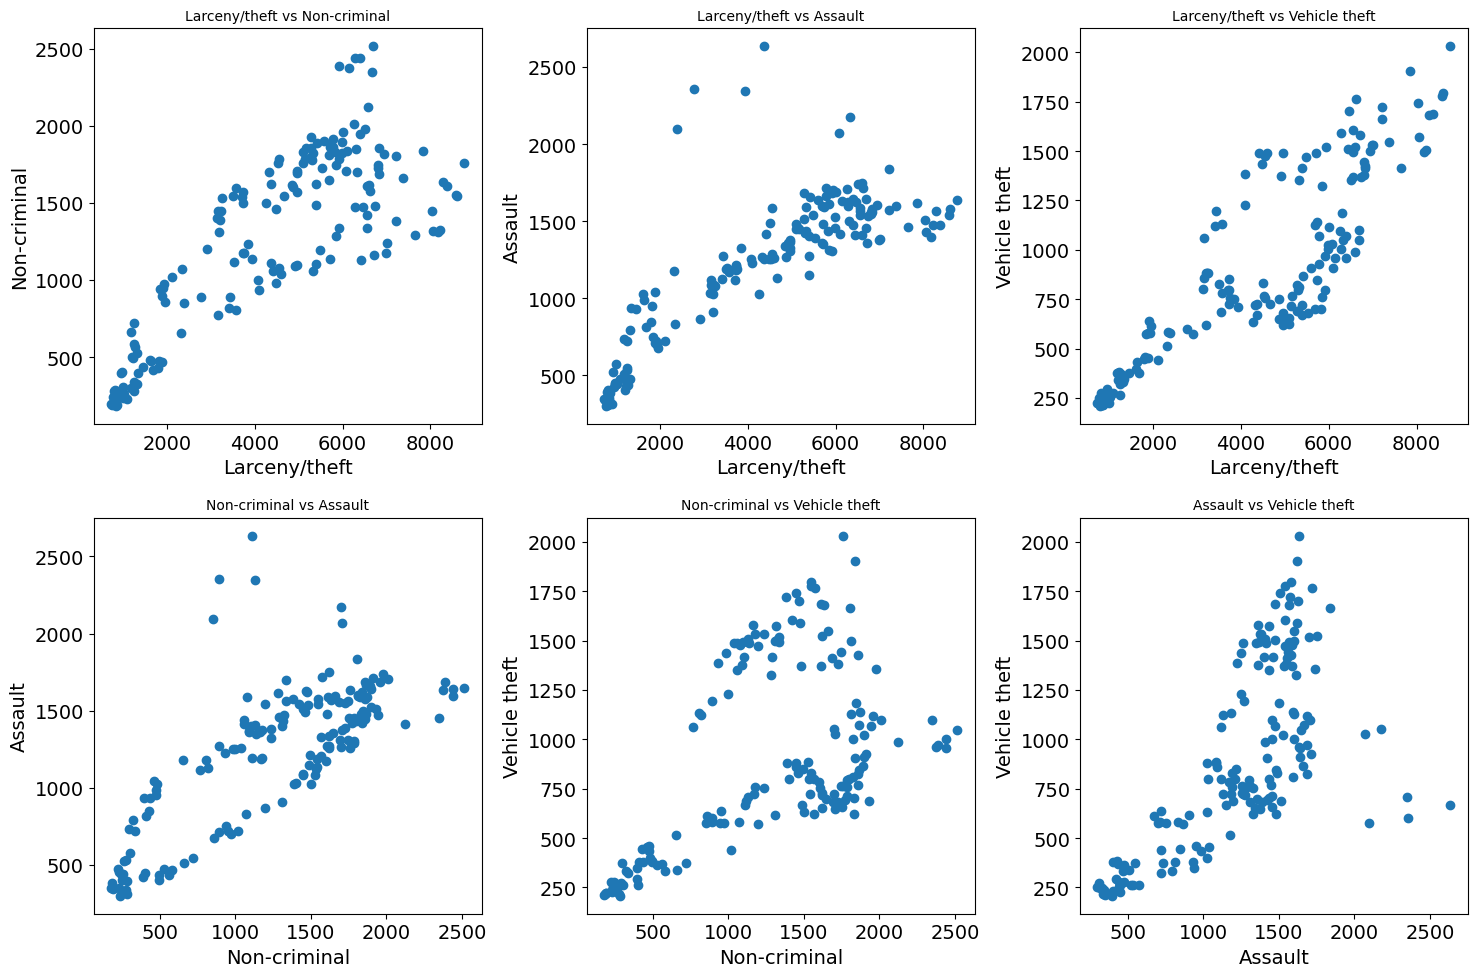

In [14]:

from itertools import combinations


# Generate all unique pairs
crime_pairs = list(combinations(focus_crimes, 2))
num_pairs = len(crime_pairs)

# Define a 2x3 grid
rows = 2
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
axes = axes.flatten()

for i, (crime1, crime2) in enumerate(crime_pairs):
    axes[i].scatter(weekly_counts[crime1], weekly_counts[crime2])
    axes[i].set_xlabel(crime1)
    axes[i].set_ylabel(crime2)
    axes[i].set_title(f'{crime1} vs {crime2}', fontsize=10)

# Turn off any empty subplots (in this case, none, but good practice)
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

As the next step we will add the linear regression line to each of the plot. This will help us highlight and visualize the correlation better. 

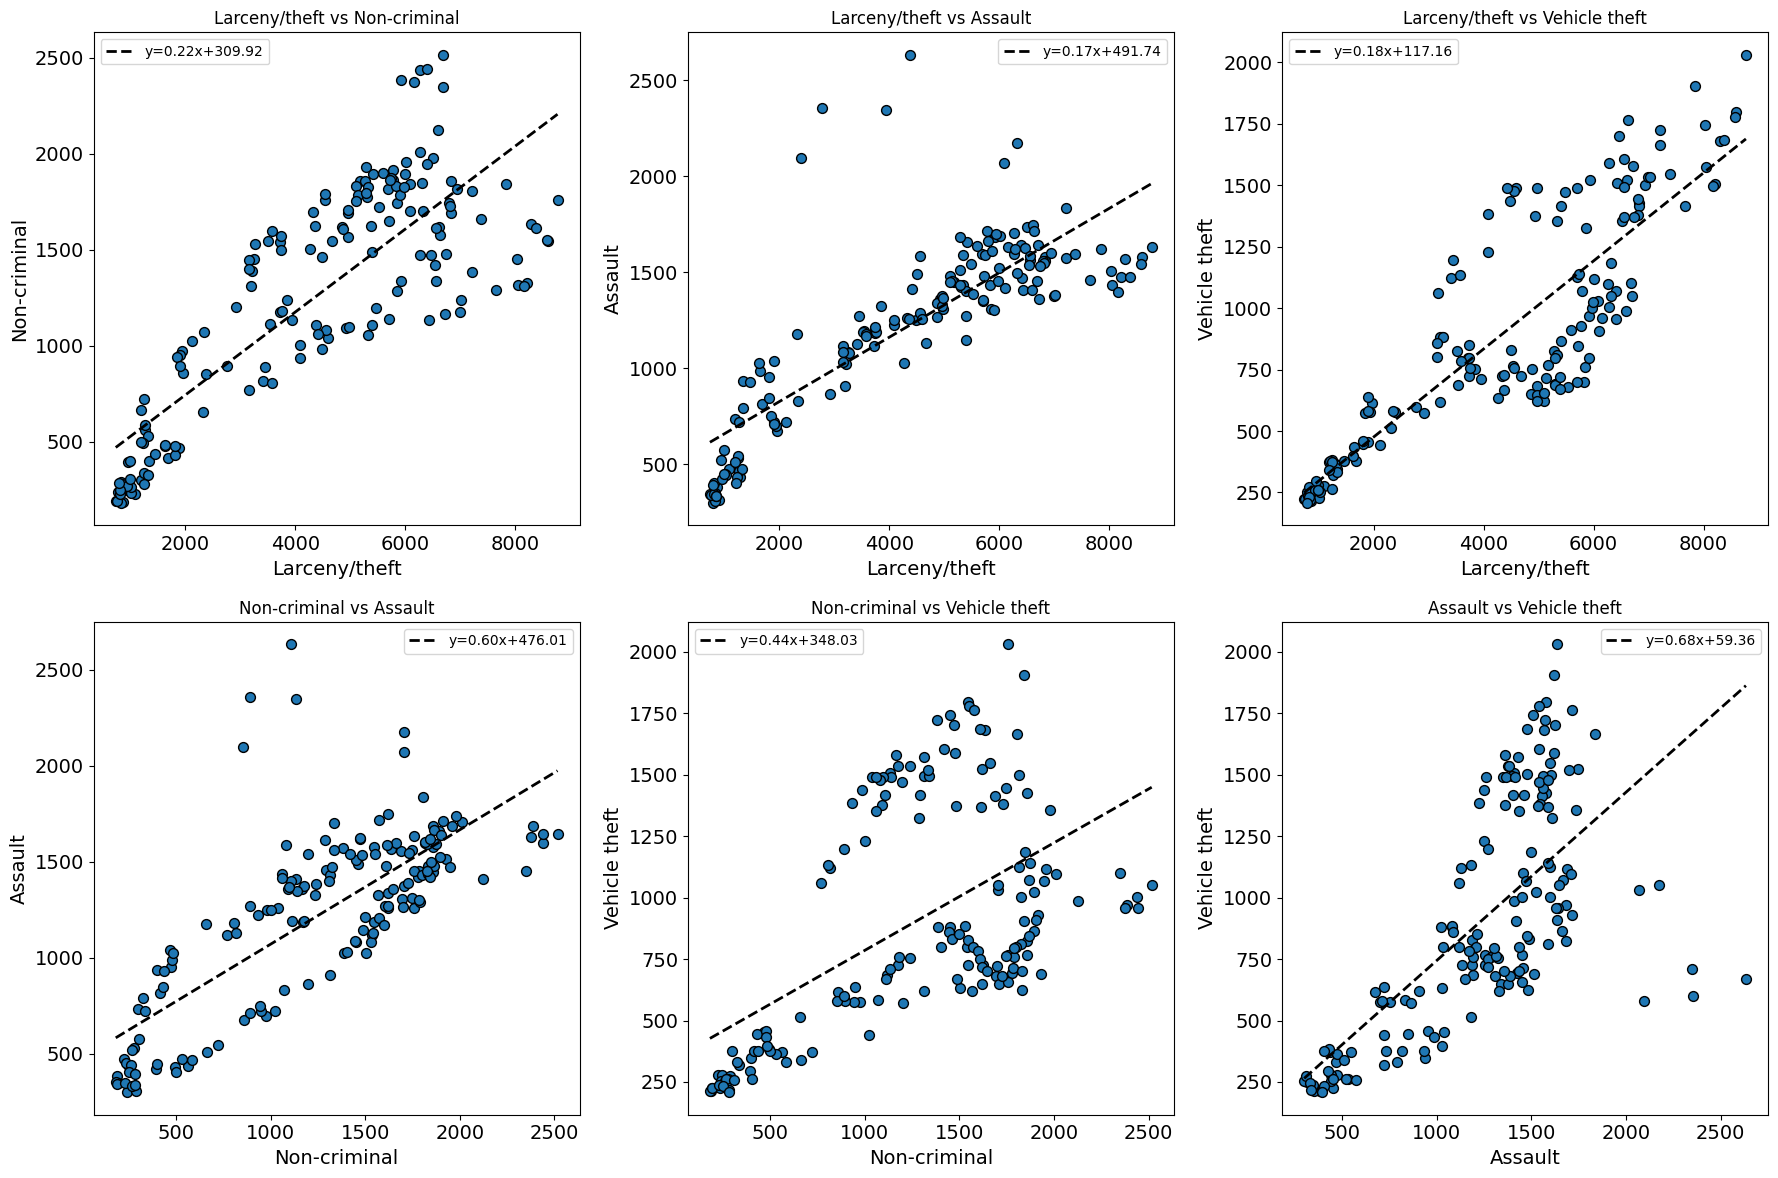

In [15]:
crime_pairs = list(combinations(focus_crimes, 2))

# Create a 2x3 grid for 6 plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()


for i, (crime1, crime2) in enumerate(crime_pairs):
    x = weekly_counts[crime1].values
    y = weekly_counts[crime2].values
    ax = axes[i]
    
    # Scatter plot with color gradient
    ax.scatter(x, y,  edgecolor='k', s=50)
    
    # Compute slope and intercept manually
    x_mean = x.mean()
    y_mean = y.mean()
    slope = np.sum((x - x_mean)*(y - y_mean)) / np.sum((x - x_mean)**2)
    intercept = y_mean - slope * x_mean
    
    # Plot regression line
    x_line = np.linspace(x.min(), x.max(), 100)
    y_line = slope * x_line + intercept
    ax.plot(x_line, y_line, color='black', linestyle='--', linewidth=2, label=f'y={slope:.2f}x+{intercept:.2f}')
    
    ax.set_xlabel(crime1)
    ax.set_ylabel(crime2)
    ax.set_title(f'{crime1} vs {crime2}', fontsize=12)
    ax.legend(fontsize=10)

# Turn off empty subplots if any
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Lastly, we recreate the same plots but this time adding the R^2 values. 

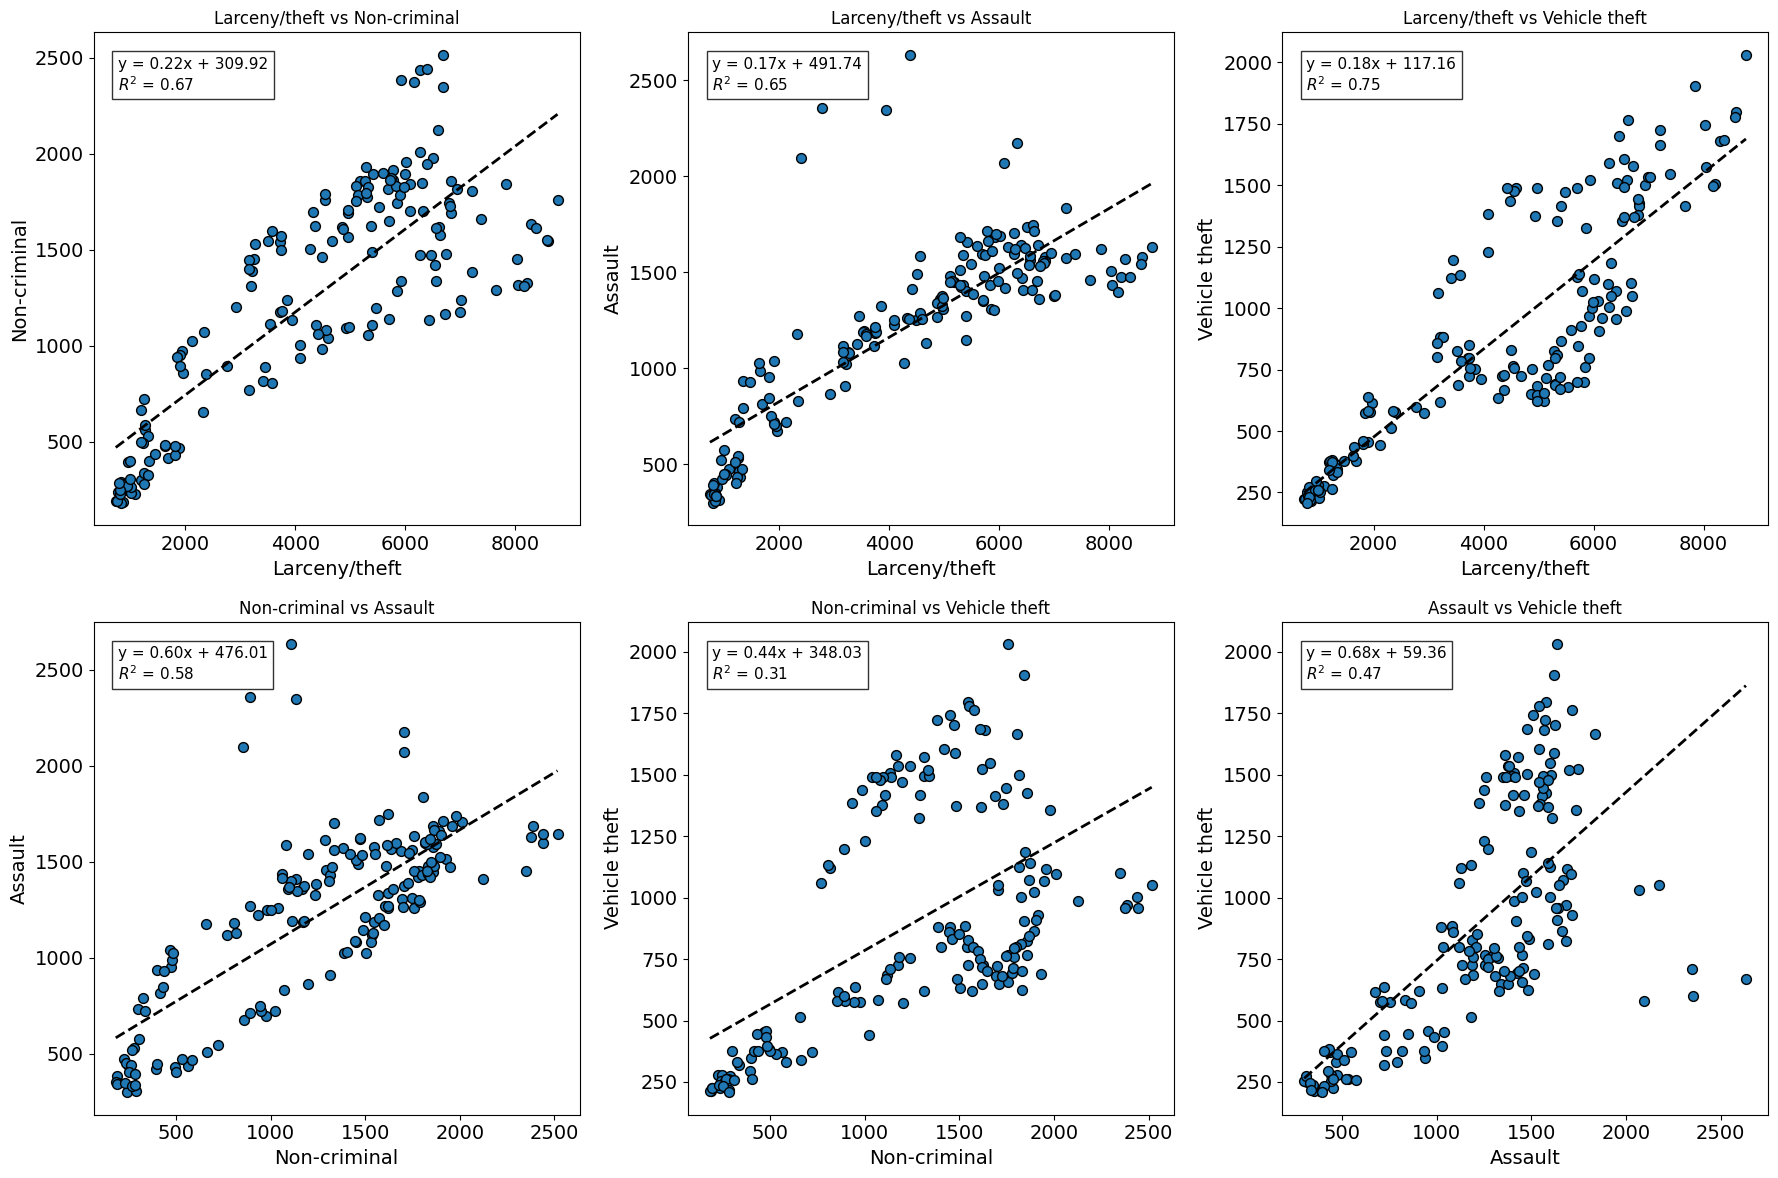

In [16]:
crime_pairs = list(combinations(focus_crimes, 2))

# Create grid (adjust size if needed)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, (crime1, crime2) in enumerate(crime_pairs):
    
    x = weekly_counts[crime1].values
    y = weekly_counts[crime2].values
    ax = axes[i]
    
    # Scatter plot
    ax.scatter(x, y, edgecolor='k', s=50)
    
    N = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    slope = (np.sum(x*y) - N*x_mean*y_mean) / (np.sum(x**2) - N*x_mean**2)
    intercept = y_mean - slope * x_mean
    
    # Regression line
    x_line = np.linspace(x.min(), x.max(), 100)
    y_line = slope * x_line + intercept
    ax.plot(x_line, y_line, color='black', linestyle='--', linewidth=2)
    
    y_pred = slope * x + intercept
    
    SS_res = np.sum((y - y_pred)**2)
    SS_tot = np.sum((y - y_mean)**2)
    
    R2 = 1 - SS_res / SS_tot
    
    ax.set_xlabel(crime1)
    ax.set_ylabel(crime2)
    ax.set_title(f'{crime1} vs {crime2}', fontsize=12)
    
    # Show equation and R^2 on plot
    ax.text(0.05, 0.95,
            f'y = {slope:.2f}x + {intercept:.2f}\n$R^2$ = {R2:.2f}',
            transform=ax.transAxes,
            fontsize=11,
            verticalalignment='top',
            bbox=dict(facecolor='white', alpha=0.8))

# Turn off unused subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# Conclusion:

The most correlated pair is lacency/theft and vehicle theft, which makes sense as they can be categorized under in the same umbrella of crime type. The least correlated are the non-criminal incidents and vehicle theft. This is also a plausible result as we were expected that the least correlated pait would indeed contain the Non-criminal incidents as that is clearly the "odd one out". Overall, the results matched our expectation. We would overall beleive that two crimes would have similar rythm if they are linked in some way (like Drug offence and theft for example as one is usually happening while being affected by the other) or are in the same or neighbouring cattegories (like sexual assault and assault).

## Contribution
Pragalva Dhungana - S250129 - Section 1.1 -1.3


Ludmila Golomozin - S215114 - Section 1.4 - 1.5